In [19]:
#Import Machine Learning Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
house_market = pd.read_csv('USA_Housing.csv')
house_market.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
house_market.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [22]:
house_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<AxesSubplot:xlabel='Price', ylabel='Count'>

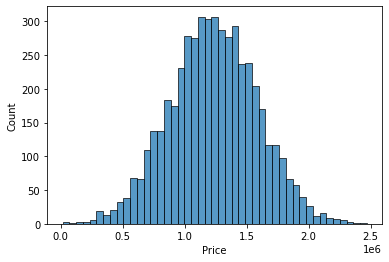

In [23]:
sns.histplot(house_market['Price'])

<AxesSubplot:>

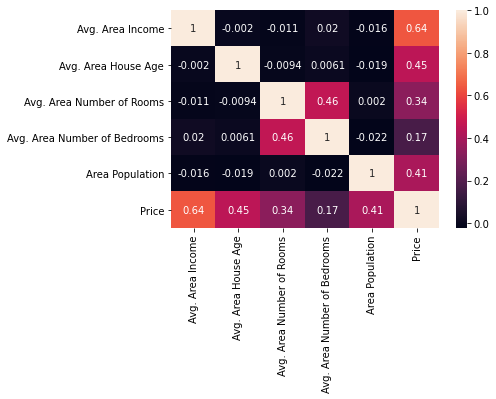

In [24]:
sns.heatmap(house_market.corr(),annot = True)

In [25]:
#Output of the column names
house_market.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
#Define the Input Variables
input_variables = house_market[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [27]:
#Define Output Variables
output_variable = house_market['Price']

In [52]:
#Now we can use Sklearn to split our testing data and our training data
x_train, x_test, y_train, y_test = train_test_split(input_variables, output_variable, test_size = 0.3, random_state = 101)

In [53]:
#Instantiate the class
Lm = LinearRegression()

In [54]:
#Apply the fit method to the training data
Lm.fit(x_train,y_train)

LinearRegression()

In [55]:
#Use the coefficent attribute to obtain the coefficent values approximating Y based on our linear regression fit of the training data
Lm.coef_

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [56]:
#Create a dataframe of the coeffiecnts
cdf = pd.DataFrame(Lm.coef_, index = input_variables.columns,columns = ['Coeff'])
cdf

,Coeff
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [83]:
#Now we are going to make predictions using our training data
predictions = Lm.predict(x_test)
predictions

array([1258934.89505291,  822694.63411034, 1742214.39530127, ...,
       1452640.96473346,  645797.13026303, 1364943.76221896])

In [76]:
print('Predictions Array', predictions.size)
print('y_test Array', y_test.size)

Predictions Array 1500
y_test Array 1500


In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 2654 to 4959
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              3500 non-null   float64
 1   Avg. Area House Age           3500 non-null   float64
 2   Avg. Area Number of Rooms     3500 non-null   float64
 3   Avg. Area Number of Bedrooms  3500 non-null   float64
 4   Area Population               3500 non-null   float64
dtypes: float64(5)
memory usage: 164.1 KB


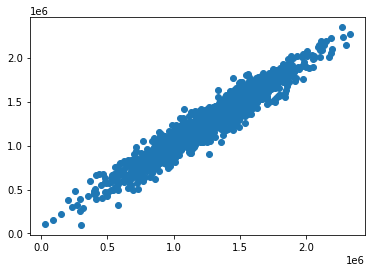

In [84]:
#Now we want to plot the predicted values against the actual test values
plt.scatter(y_test,predictions)

Here as we can see, the scatter plot appears to be a linear cluster. This linear cluster is a good indication that our predictions closely match our test results.

### Was linear regression an appropriate model?
To determine if our model was appropriate, we need to create a distribution plot of our residuals between our test values and predicted values.


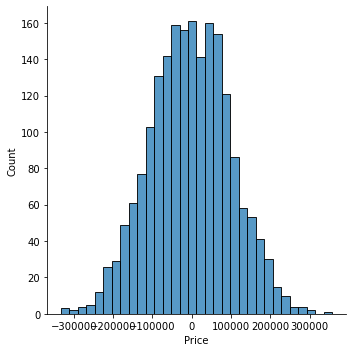

In [36]:
sns.displot(data = (y_test - predictions))

Our plot above seems to have a normal distribution, indicating that we have likely choosen the correct model. If the distribution plot does not have a normal distribution, then we must reconsider our model.

### Regression Metrics

In [37]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [38]:
#Mean Squared Error
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [39]:
#Mean Root Squared Error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291153

In [40]:
def regressionMetrics(testData, predictedValues):
    print('Mean Absolute Error: ', metrics.mean_absolute_error(testData, predictedValues))
    print('Mean Squared Error: ', metrics.mean_squared_error(testData, predictedValues))
    print('Mean Root Squared Error: ', np.sqrt(metrics.mean_squared_error(testData, predictedValues)))

In [41]:
regressionMetrics(y_test, predictions)

Mean Absolute Error:  82288.22251914957
Mean Squared Error:  10460958907.209501
Mean Root Squared Error:  102278.82922291153
